# Data Science and Business Analytics Intern @ The Sparks Foundation

# Intern Name : Suresh

# Task 2 : Prediction Using Unsupervised Machine Learning


In this model fist we will find the optimal numbers of clusters in iris dataset and after we will visualize them.

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# load iris dataset
iris=datasets.load_iris()
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Sepal length,Sepal width,Petal length,Petal width

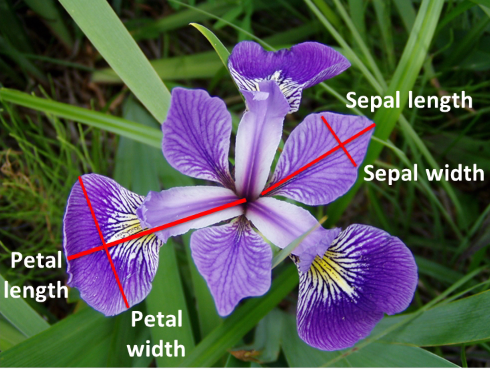

In [3]:
# check there null values available or not
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [4]:
# basic information about  iris dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# columns of iris dataset
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [7]:
x=data.iloc[:,[0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
# correlation between the features of iris dataset
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


# Data Visualization

Scatter plot between sepal length and sepal width

Text(0, 0.5, 'sepel width')

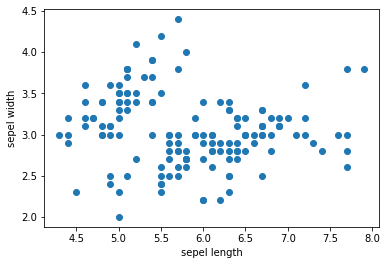

In [9]:
plt.scatter(data['sepal length (cm)'],data['sepal width (cm)'])
plt.xlabel('sepel length')
plt.ylabel('sepel width')

Scatter between petel length and petel width

Text(0, 0.5, 'petel width')

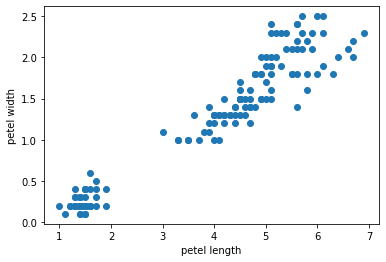

In [10]:
plt.scatter(data['petal length (cm)'],data['petal width (cm)'])
plt.xlabel('petel length')
plt.ylabel('petel width')

# Finding the optimal number of clusters using Elbow method

This method finds the optimal number of clusters using WCSS concept which stands for within cluster sum of square.
It finds the distance between each data point and its nearest centroid.


Steps of elbow method:
    1. It execute the kmeans clustering algo. on diffrent k values like in range 1 to 10.
    2. find the the value of WCSS for each value of k.
    3. Make a plot between WCSS value and k.
    4. Now find the point where the plot line suddenly bend and on that point the k value will be selected as cluster number.

C:\Users\sures\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow method graph')

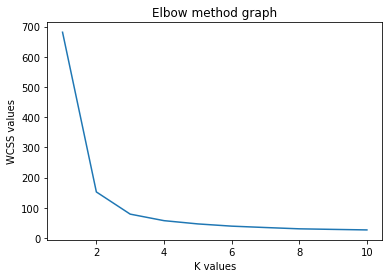

In [11]:
from sklearn.cluster import KMeans
# create a list for WCSS values
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# now make a plot between wcss values and k values
plt.plot(range(1,11),wcss)
plt.xlabel('K values')
plt.ylabel('WCSS values')
plt.title('Elbow method graph')


here we can observe that at the k=3 the plot line sudden bend and this point is called as elbow point.
hence we will choose the optimal number of clusters 3.

# Training the Kmeans Algorithm

In [12]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y=kmeans.fit_predict(x)

In [13]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# Visualization of Clusters

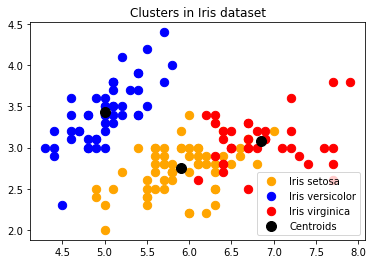

In [14]:
# first visualize the clusters
plt.scatter(x[y==0,0],x[y==0,1],s=70,c='orange',label='Iris setosa')
plt.scatter(x[y==1,0],x[y==1,1],s=70,c='blue',label='Iris versicolor')
plt.scatter(x[y==2,0],x[y==2,1],s=70,c='red',label='Iris virginica')

# visualize the cluster_centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters in Iris dataset')
plt.legend()

here we can see in plot that based on there similarity,clusters created